# Measure Ping

Ping, unlike download and upload speeds, is a measure where lower values are better. A low ping indicates a more responsive connection, while a high ping might suggest delays or lags. 

We use decay function for it.
The exponential decay function is of the form:  
$P(p) = L \cdot e^{-k \cdot p}$

Where:
- \( P(p) \) is the percentage for a given ping \( p \).
- \( L \) is a scaling factor, typically set to the maximum value (e.g., 100 for percentages).
- \( k \) is a rate constant that determines how rapidly the percentage decreases with increasing ping.

## Create a general formula

### Imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Core function

In [2]:
# Define the exponential decay function
def exponential_decay(p, L, k):
    return L * np.exp(-k * p)

# Generate a range of ping values for plotting
p_values = np.linspace(0, 100, 400)

# Calculate and plot the exponential decay for various k values
k_values = [0.02, 0.05, 0.1, 0.15]

### Plot

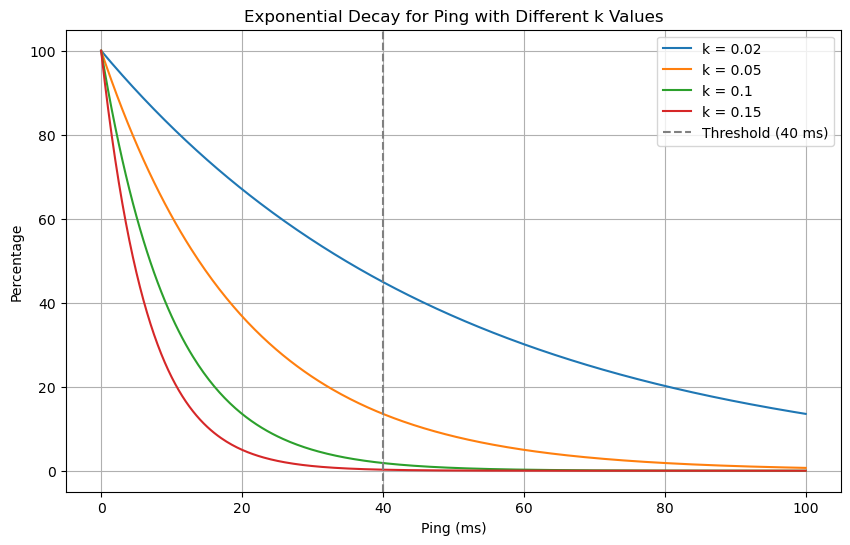

In [3]:
plt.figure(figsize=(10, 6))

for k in k_values:
    plt.plot(p_values, exponential_decay(p_values, 100, k), label=f'k = {k}')

plt.axvline(x=40, color='grey', linestyle='--', label='Threshold (40 ms)')
plt.title('Exponential Decay for Ping with Different k Values')
plt.xlabel('Ping (ms)')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)
plt.show()

## Find best params using machine learning
we assume ping below 10 to be equal (or around) to 100%, ping 40 to 60% and pings above 200 to 0%.

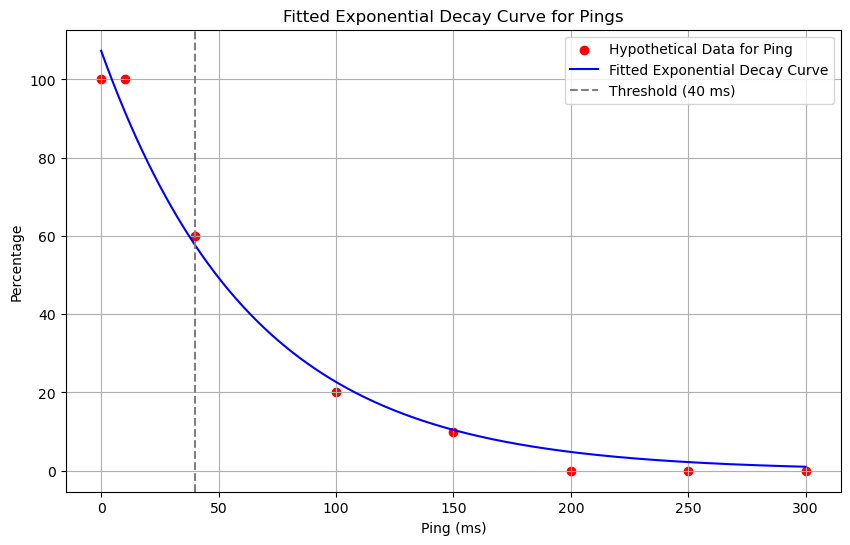

array([1.07334219e+02, 1.55416910e-02])

In [8]:
# Hypothetical dataset based on the provided specifications for ping
pings = np.array([0, 10, 40, 100, 150, 200, 250, 300])
ping_percentages = np.array([100, 100, 60, 20, 10, 0, 0, 0])

# Fit the exponential decay function to the hypothetical ping data
ping_params, ping_covariance = curve_fit(exponential_decay, pings, ping_percentages, bounds=(0, [110, 0.1]), p0=[100, 0.05])

# Predict using the fitted exponential decay function for pings
p_values_wide = np.linspace(0, 300, 600)
predicted_ping_percentages_wide = exponential_decay(p_values_wide, *ping_params)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(pings, ping_percentages, color='red', label='Hypothetical Data for Ping')
plt.plot(p_values_wide, predicted_ping_percentages_wide, label='Fitted Exponential Decay Curve', color='blue')
plt.axvline(x=40, color='grey', linestyle='--', label='Threshold (40 ms)')
plt.title('Fitted Exponential Decay Curve for Pings')
plt.xlabel('Ping (ms)')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)
plt.show()

ping_params

## Function for calculating the percentage

In [9]:
def calculate_ping_percentage(p, L=107.33, k=0.0155):
    """Calculate the percentage P for a given ping value p using the exponential decay function."""
    return L * np.exp(-k * p)

# Test the function for a few values
test_pings = [5, 10, 40, 100, 150, 200, 250, 300]
test_ping_percentages = [calculate_ping_percentage(p) for p in test_pings]

test_ping_percentages

[99.32608252849103,
 91.91904099931624,
 57.737576487036414,
 22.78057503082433,
 10.4950970500314,
 4.835130892900558,
 2.2275630839841933,
 1.0262467352052342]